In [13]:
import pandas as pd
from sklearn import cluster, datasets, metrics
import matplotlib.pyplot as plt 

In [2]:
df=pd.read_csv("Data/Country-data.csv")

In [3]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
df.shape

(167, 10)

In [6]:
len(df.country.unique())

167

In [9]:
x=df.loc[:,df.columns!="country"].values

In [15]:
km=cluster.KMeans(n_clusters=3)
km.fit(x)
km.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

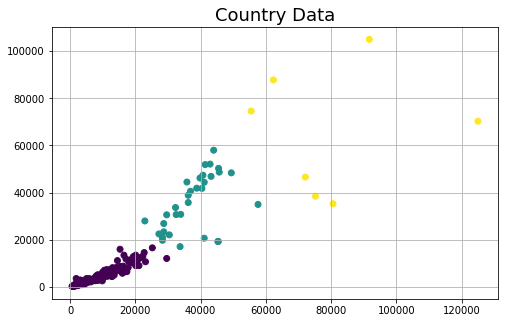

In [25]:
plt.figure(figsize=(8,5))
plt.title("Country Data", fontsize=18)
plt.grid(True)
plt.scatter(x[:,4],x[:,8],c=km.labels_)
plt.show()

In [18]:
df["Cluster"]=km.labels_

In [19]:
df.groupby('Cluster').agg({'gdpp': ['mean', 'min', 'max']})

gdpp               
                 mean    min     max
Cluster                             
0         4438.390625    231   16600
1        35587.500000  17100   58000
2        65442.857143  35300  105000

### By loooking at the GDP per capita of different clusters, we could see that k means clustering for number of clusters equal to 3 splits the data into under developed, developing and developed countries